Emotion AI. Detectar los 30 puntos faciales

Vamos a importar los dataset y analizar los datos que tenemos.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [6]:
df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [7]:
df['Image'].shape[0]

2140

In [8]:
df['Image'][0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [9]:
# Dado que los valores de la imagen son cadenas separadas por espacios
# Necesitamos convertirlo a una matriz de 1d a una de 2d (96,96)
# np.fromstring

df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96,96))

In [10]:
df['Image'][0].shape

(96, 96)

## Actividad 1
### Obtener el promedio, máximo y el mínimo solo para el right_eye_center_x

In [11]:
df.right_eye_center_x.describe()

count    2140.000000
mean       29.640269
std         2.051575
min        18.922611
25%        28.472224
50%        29.655440
75%        30.858673
max        42.495172
Name: right_eye_center_x, dtype: float64

In [12]:
df.right_eye_center_y.describe()

count    2140.000000
mean       37.063815
std         2.234334
min        24.773072
25%        35.818377
50%        37.048085
75%        38.333884
max        45.980981
Name: right_eye_center_y, dtype: float64

Vamos a visualizar las imágenes

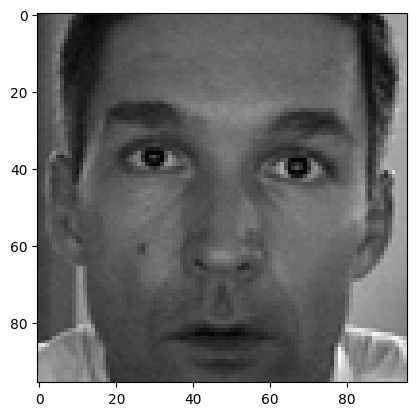

In [13]:
i = np.random.randint(0, len(df)-1)
plt.imshow(df['Image'][i], cmap='gray')
plt.show()

Vamos a dibujar los 15 puntos X e Y

C:\Users\Adri\AppData\Local\Temp\ipykernel_10916\3575253471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[i][j-1], df.loc[i][j], 'bx')


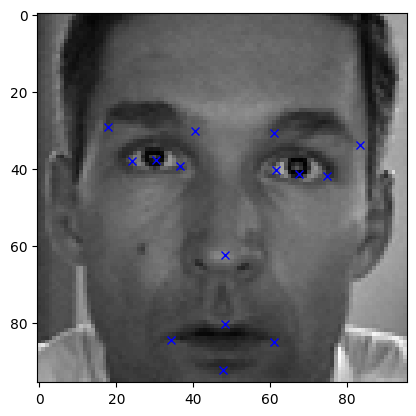

In [14]:
plt.imshow(df['Image'][i], cmap='gray')
for j in range(1,31,2):
    plt.plot(df.loc[i][j-1], df.loc[i][j], 'bx')

Dibujar las 16 primeras imágenes en 4 x 4

C:\Users\Adri\AppData\Local\Temp\ipykernel_10916\3523134092.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')


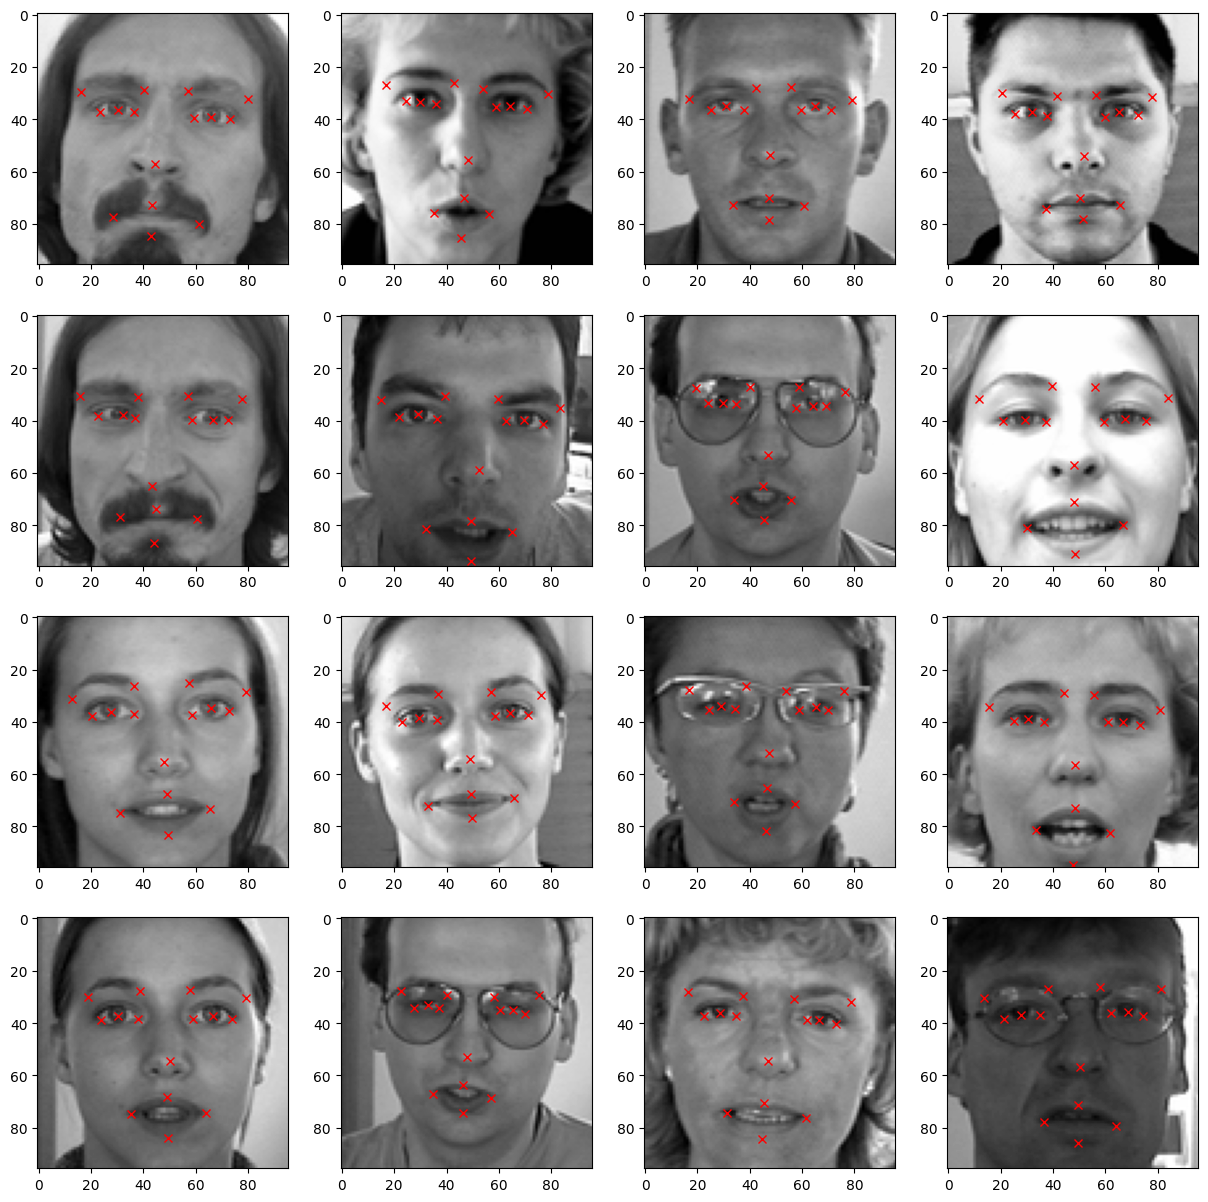

In [15]:
fig = plt.figure(figsize = (15, 15))
for i in range(16):
    fig.add_subplot(4, 4, i + 1)
    image = plt.imshow(df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')

Dibujar 64 fotos de manera aleatoria

C:\Users\Adri\AppData\Local\Temp\ipykernel_10916\3364414162.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')


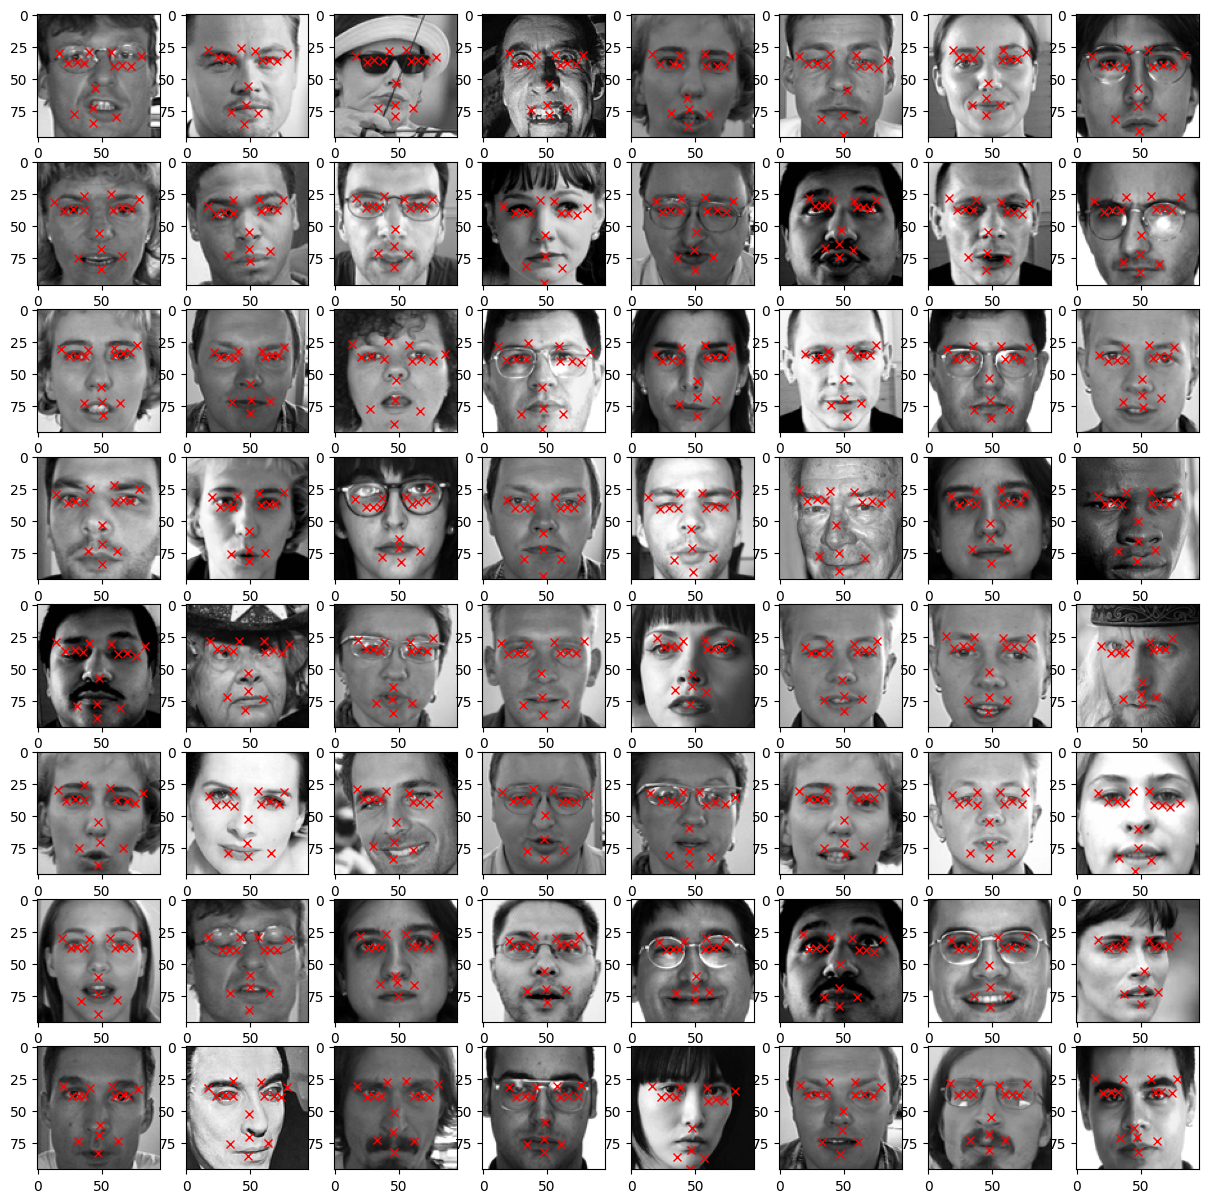

In [16]:
fig = plt.figure(figsize = (15, 15))
for i in range(64):
    random = np.random.randint(0, len(df)-1)
    fig.add_subplot(8, 8, i + 1)
    image = plt.imshow(df['Image'][random], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(df.loc[i][j-1], df.loc[i][j], 'rx')

Más imágenes. ¿Qué vamos a hacer aquí?

In [17]:
# Vamos a crear una copia del dataframe
import copy
df2 = copy.copy(df)

In [18]:
df2['Image'] = df2['Image'].apply(lambda x: np.fliplr(x))

Text(0.5, 1.0, 'Imagen Original')

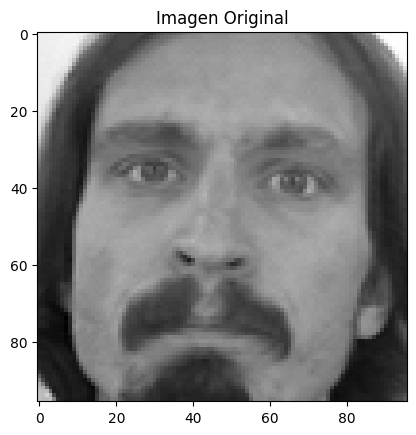

In [19]:
plt.imshow(df['Image'][0], cmap = 'gray')
plt.title('Imagen Original')

Text(0.5, 1.0, 'Imagen Volteada')

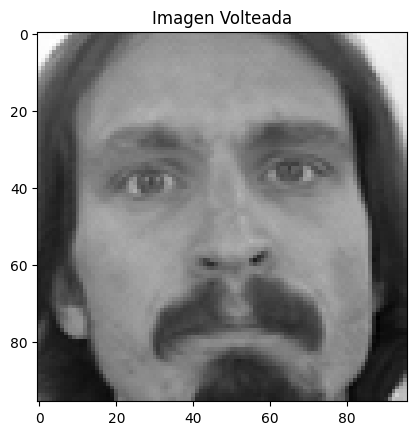

In [20]:
plt.imshow(df2['Image'][0], cmap = 'gray')
plt.title('Imagen Volteada')

Dado que estamos volteando horizontalmente solo necesitamos cambiar los puntos x. Para ello tenemos que restar nuestros valores de la cooredena x al ancho de la imagen

C:\Users\Adri\AppData\Local\Temp\ipykernel_10916\3207931869.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.loc[i][j-1], df.loc[i][j], 'bx')


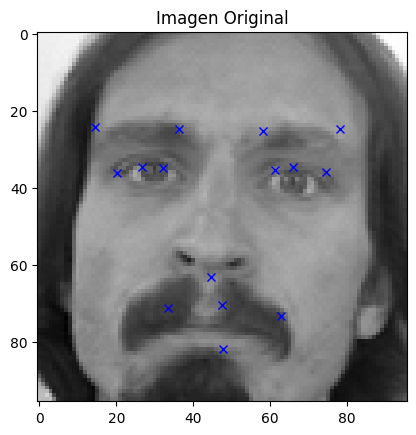

In [21]:
plt.imshow(df['Image'][0], cmap='gray')
plt.title('Imagen Original')
for j in range(1,31,2):
    plt.plot(df.loc[i][j-1], df.loc[i][j], 'bx')

In [22]:
columns = df2.columns[:-1]
for i in range(29):
    if i % 2 == 0:
        df2[columns[i]] = df2[columns[i]].apply(lambda x: 96 - x)


C:\Users\Adri\AppData\Local\Temp\ipykernel_10916\659812584.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df2.loc[0][j-1], df2.loc[0][j], 'bx')


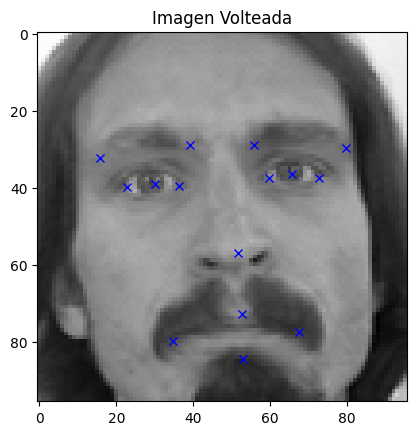

In [23]:
plt.imshow(df2['Image'][0], cmap = 'gray')
plt.title('Imagen Volteada')
for j in range(1,31,2):
    plt.plot(df2.loc[0][j-1], df2.loc[0][j], 'bx')